<a href="https://colab.research.google.com/github/JamesCFabrianes/Google-Collab-Python-/blob/main/B64_Mall_Customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/mall.csv")

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [ ]:
import plotly.express as px

In [ ]:
fig = px.box(df, x = "Annual Income (k$)")
fig.show()

In [ ]:
fig = px.histogram(df, x = "Genre", color = "Genre")
fig.show()

In [ ]:
fig = px.scatter(df,
                 x = "Spending Score (1-100)",
                 y = "Annual Income (k$)",
                 color = "Genre")

fig.show()

In [ ]:
data = df[["Annual Income (k$)",
           "Spending Score (1-100)"]]

# Elbow Method

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist

In [ ]:
distortions = []
inertias = []

for k in range(1, 11):
    kmeanmodel = KMeans(n_clusters = k).fit(data)
    nilai_distorsi = sum(np.min(cdist(data, kmeanmodel.cluster_centers_,
                                      "euclidean"), axis = 1)) / data.shape[0]

    nilai_inersia = kmeanmodel.inertia_
    distortions.append(nilai_distorsi)
    inertias.append(nilai_inersia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

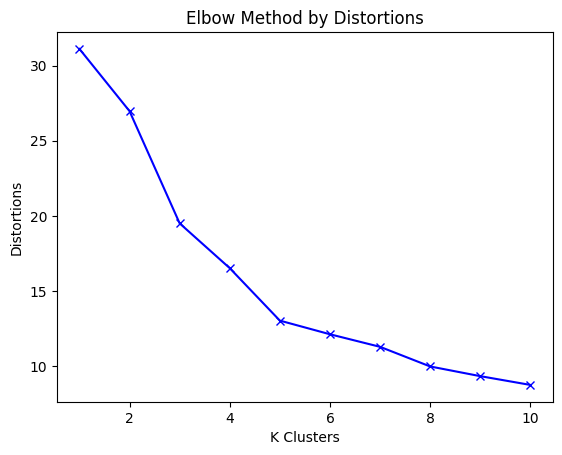

In [ ]:
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel("K Clusters")
plt.ylabel("Distortions")
plt.title("Elbow Method by Distortions")
plt.show()

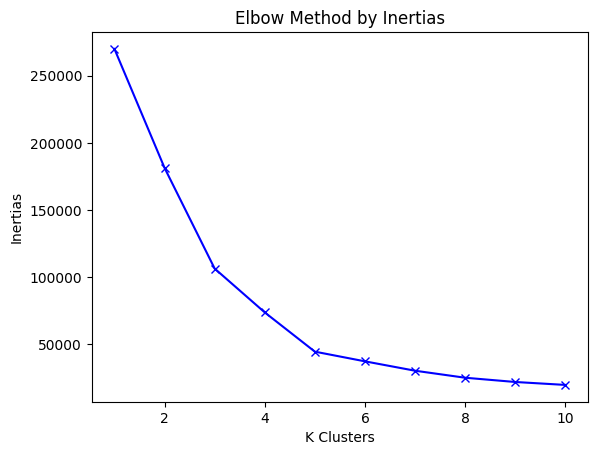

In [ ]:
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel("K Clusters")
plt.ylabel("Inertias")
plt.title("Elbow Method by Inertias")
plt.show()

In [ ]:
distortions

[31.11956466178274,
 26.9728389711296,
 19.49852756350156,
 16.513850087397763,
 13.020126350791745,
 12.110098960306809,
 11.27281439872567,
 9.965467073733864,
 9.319620307660982,
 8.735473511183079]

In [ ]:
inertias

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30241.34361793658,
 25018.57633477634,
 21850.165282585636,
 19664.68519600554]

In [ ]:
model = KMeans(n_clusters = 5, random_state = 2023)
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=2023)

In [ ]:
pred = model.labels_
pred

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [ ]:
data["Cluster Customer"] = pred.astype(int)
data.head()

<ipython-input-20-9568833f3fc0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Annual Income (k$),Spending Score (1-100),Cluster Customer
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2


<ipython-input-25-a0cff8dbc622>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



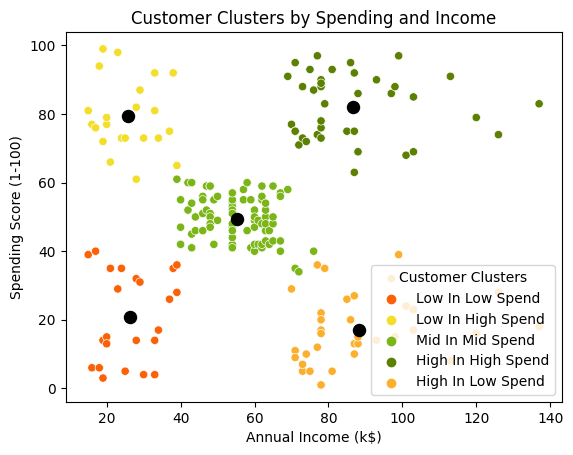

In [ ]:
def set_type(nomor):
    list_type = ["Mid In Mid Spend",
                 "High In Low Spend",
                 "Low In Low Spend",
                 "High In High Spend",
                 "Low In High Spend"]

    return list_type[nomor]

data["Customer Type"] = data["Cluster Customer"].apply(lambda x: set_type(x))

color_palette = ["#FB6107", "#F3DE2C", "#7CB518", "#5C8001", "#FBB02D"]

sns.scatterplot(x = "Annual Income (k$)",
                y = "Spending Score (1-100)",
                hue = "Customer Type",
                data = data,
                palette = color_palette)

#Centroid
centroids = model.cluster_centers_

plt.scatter(centroids[:, 0],
            centroids[:, 1],
            c = "black",
            s = 75)

plt.title("Customer Clusters by Spending and Income")

plt.legend(loc = "lower right", title="Customer Clusters")
plt.show()

In [ ]:
data["Customer Type"].value_counts()

Mid In Mid Spend      81
High In High Spend    39
High In Low Spend     35
Low In Low Spend      23
Low In High Spend     22
Name: Customer Type, dtype: int64